<a href="https://colab.research.google.com/github/ENG19CS0334-TEJAAL-M/AI-ML/blob/main/SEM1/ML/lab_4_linearregression_leastsquare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with Least Squares Estimate

## Linear Regression with implementation of least square estimates

The linear regression line is defined as $$y = \theta_0 + \theta_1 x $$

The parameters $\theta_0$ and $\theta_1$ can be computed using Least square estimates.

$$\theta_1 = \frac{\sum_{i=1}^n ( x^i - \bar x ) ( y^i - \bar y ) }{\sum_{i=1}^n ( x^i - \bar x )^2 } $$

$$ \theta_0 = \bar y - \theta_1 \bar x $$

Use the above method to fit a regression line for the salary dataset.

Reference: https://towardsdatascience.com/

### Step 1: Import libraries and dataset

In [2]:
## Import all the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [5]:
## Import the dataset

data = pd.read_csv('salary_data.csv')
# change the path as necessary

X = data.iloc[:, :-1].values # copy all columns excluding last column
Y = data.iloc[:, 1].values   # copy the last column only

# View the size of the arrays X and Y
print(X.shape)
print(Y.shape)

(30, 1)
(30,)


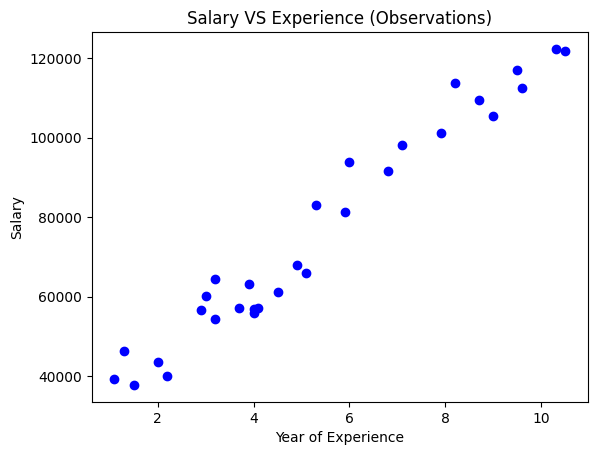

In [6]:
# Visualize the dataset

plt.scatter(X, Y, color='blue')
plt.title('Salary VS Experience (Observations)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

Step 2 is skipped.

### Step 3: Create and train the machine learning model

In [7]:
# Build the model

# Find the means
X_mean = np.mean(X)
Y_mean = np.mean(Y)

# Find the summation parts
num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2

# Find the parameters
theta1 = num / den
theta0 = Y_mean - theta1 * X_mean



### Step 4: Visualize the results

In [8]:
# The coefficients

# print the parameter theta1
print('Theta1 = ', theta1)
# print the parameter theta0
print('Theta0 = ', theta0)

Theta1 =  [9449.96232146]
Theta0 =  [25792.20019867]


### Step 5: Prediction

In [9]:
# Predict the values for the given X
Y_pred = theta1 * X + theta0

# Predict values for say x = 7
x = 7

y_pred = theta1 * x + theta0

print('For x= 7 yrs of experience, predicted salary = ', y_pred)

For x= 7 yrs of experience, predicted salary =  [91941.93644885]


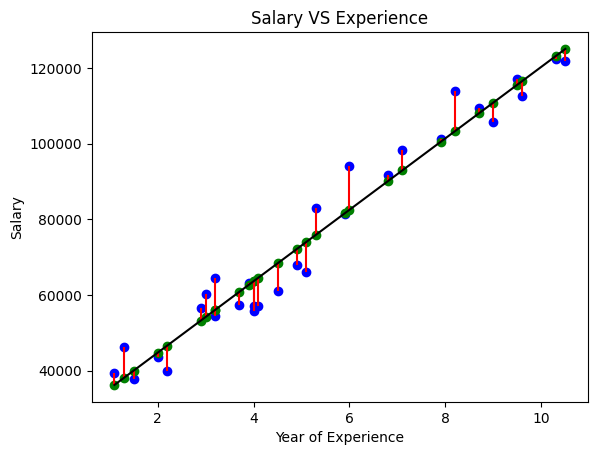

In [10]:
# Visualize the dataset and plot the residuals

fig, ax = plt.subplots()
Y = Y.reshape(-1,1)

ax.scatter(X, Y, color='blue')       # observed values
ax.scatter(X, Y_pred, color='green') # predicted values
ax.vlines(X,Y, Y_pred, color='red')  # residual lines
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='black')  # regression line

plt.title('Salary VS Experience')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

### Step 6: Performance measures

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean squared error = %.2f" % mean_squared_error(Y, Y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score = %.2f' % r2_score(Y, Y_pred))

Mean squared error = 31270951.72
Variance score = 0.96
